In [ ]:
!pip install datasets peft accelerate

In [ ]:
pip install -U bitsandbytes --upgrade

In [ ]:
pip install transformers --upgrade

In [1]:
import os
os.environ['HUGGING_FACE_HUB_TOKEN'] = 'Your_Token_with_read_access'

In [2]:
#Imports
import random
from datasets import load_dataset

In [3]:
spider_dataset = load_dataset("spider")

Generating train split:   0%|          | 0/7000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1034 [00:00<?, ? examples/s]

In [4]:
#Print the first sample of the training set
print (spider_dataset['train'][0])

{'db_id': 'department_management', 'query': 'SELECT count(*) FROM head WHERE age  >  56', 'question': 'How many heads of the departments are older than 56 ?', 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'head', 'WHERE', 'age', '>', '56'], 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'head', 'where', 'age', '>', 'value'], 'question_toks': ['How', 'many', 'heads', 'of', 'the', 'departments', 'are', 'older', 'than', '56', '?']}


In [5]:
#Print the first 10 sample of the training set
print("\n".join(str(spider_dataset['train'][i]) for i in range(10)))

{'db_id': 'department_management', 'query': 'SELECT count(*) FROM head WHERE age  >  56', 'question': 'How many heads of the departments are older than 56 ?', 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'head', 'WHERE', 'age', '>', '56'], 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'head', 'where', 'age', '>', 'value'], 'question_toks': ['How', 'many', 'heads', 'of', 'the', 'departments', 'are', 'older', 'than', '56', '?']}
{'db_id': 'department_management', 'query': 'SELECT name ,  born_state ,  age FROM head ORDER BY age', 'question': 'List the name, born state and age of the heads of departments ordered by age.', 'query_toks': ['SELECT', 'name', ',', 'born_state', ',', 'age', 'FROM', 'head', 'ORDER', 'BY', 'age'], 'query_toks_no_value': ['select', 'name', ',', 'born_state', ',', 'age', 'from', 'head', 'order', 'by', 'age'], 'question_toks': ['List', 'the', 'name', ',', 'born', 'state', 'and', 'age', 'of', 'the', 'heads', 'of', 'departments', 'order

In [6]:
#Print total number of rows in the training set
num_rows = len(spider_dataset["train"])
print(f"Number of rows in the training split: {num_rows}")

Number of rows in the training split: 7000


In [7]:
#Print the first 10 sample of the validation set
validation_set = spider_dataset['validation']
print("\n".join(str(validation_set[i]) for i in range(10)))

{'db_id': 'concert_singer', 'query': 'SELECT count(*) FROM singer', 'question': 'How many singers do we have?', 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'singer'], 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'singer'], 'question_toks': ['How', 'many', 'singers', 'do', 'we', 'have', '?']}
{'db_id': 'concert_singer', 'query': 'SELECT count(*) FROM singer', 'question': 'What is the total number of singers?', 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'singer'], 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'singer'], 'question_toks': ['What', 'is', 'the', 'total', 'number', 'of', 'singers', '?']}
{'db_id': 'concert_singer', 'query': 'SELECT name ,  country ,  age FROM singer ORDER BY age DESC', 'question': 'Show name, country, age for all singers ordered by age from the oldest to the youngest.', 'query_toks': ['SELECT', 'name', ',', 'country', ',', 'age', 'FROM', 'singer', 'ORDER', 'BY', 'age', 'DESC'], 'query_toks_no

In [8]:
#Print total number of rows in the validation set
num_rows = len(validation_set)
print(f"Number of rows in the validation split: {num_rows}")

Number of rows in the validation split: 1034


# Randomly sampling the training set

To expedite experimentation and manage resource constraints, we'll create a smaller, randomly sampled dataset from the original Spider training set. This approach reduces training time for large language models like Llama 3.1, making it feasible to run experiments on platforms with limited resources. This smaller dataset can be used for initial model training and evaluation before potentially scaling up to the full training set.

In [9]:
#Randomly sample training set
train_dataset = spider_dataset["train"]

# Set the number of random samples you want
num_samples = 500

# Get a list of random indices
random_indices = random.sample(range(len(train_dataset)), num_samples)

# Create a new dataset with the random samples
sampled_train = train_dataset.select(random_indices)

# Now you can use 'random_dataset' for training
print(f"Number of rows in the randomly sampled train dataset: {len(sampled_train)}")

Number of rows in the randomly sampled train dataset: 500


In [10]:
#Print the first 10 sample of the sampled train set
print("\n".join(str(sampled_train[i]) for i in range(10)))

{'db_id': 'formula_1', 'query': 'SELECT DISTINCT T1.forename FROM drivers AS T1 JOIN driverstandings AS T2 ON T1.driverid = T2.driverid WHERE T2.position = 1 AND T2.wins = 1', 'question': 'What are all the different first names of the drivers who are in position as standing and won?', 'query_toks': ['SELECT', 'DISTINCT', 'T1.forename', 'FROM', 'drivers', 'AS', 'T1', 'JOIN', 'driverstandings', 'AS', 'T2', 'ON', 'T1.driverid', '=', 'T2.driverid', 'WHERE', 'T2.position', '=', '1', 'AND', 'T2.wins', '=', '1'], 'query_toks_no_value': ['select', 'distinct', 't1', '.', 'forename', 'from', 'drivers', 'as', 't1', 'join', 'driverstandings', 'as', 't2', 'on', 't1', '.', 'driverid', '=', 't2', '.', 'driverid', 'where', 't2', '.', 'position', '=', 'value', 'and', 't2', '.', 'wins', '=', 'value'], 'question_toks': ['What', 'are', 'all', 'the', 'different', 'first', 'names', 'of', 'the', 'drivers', 'who', 'are', 'in', 'position', 'as', 'standing', 'and', 'won', '?']}
{'db_id': 'activity_1', 'query': 

# Check for any inconsistencies in the datasets

The following code cell checks for potential inconsistencies in the randomly sampled training set (sampled_train) and the validation set (validation_set). It verifies if any questions or their corresponding SQL queries are empty, which could indicate data errors or annotation issues. Identifying and addressing these inconsistencies before fine-tuning is crucial to ensure the model is trained on reliable data, leading to better performance and preventing unexpected behavior.

In [11]:
def check_dataset_inconsistencies(dataset, split_name):
    """
    Checks for inconsistencies in the Spider dataset, such as empty questions or queries.

    Args:
        dataset: The Hugging Face dataset object.
        split_name: The name of the split (e.g., "train", "validation").
    """

    num_inconsistencies = 0
    for i, example in enumerate(dataset):
        if not example["question"].strip() or not example["query"].strip():
            print(f"Inconsistency found in {split_name} split, example {i}:")
            print(f"  Question: {example['question']}")
            print(f"  Query: {example['query']}")
            num_inconsistencies += 1

    print(f"Total inconsistencies found in {split_name} split: {num_inconsistencies}")


# Call the function:
check_dataset_inconsistencies(sampled_train, "sampled_train")
check_dataset_inconsistencies(validation_set, "validation")

Total inconsistencies found in sampled_train split: 0
Total inconsistencies found in validation split: 0


# Analyzing Sequence Lengths and Determining Maximum Sequence Length

This code analyzes the distribution of question and query lengths in the sampled_train dataset after tokenization with the Llama 3.1 tokenizer. This analysis is crucial for determining an appropriate max_length parameter for padding and truncating sequences during the fine-tuning process.
The code performs the following:
Tokenization and Length Calculation: It tokenizes the questions and queries in the dataset using the Llama 3.1 tokenizer and calculates the length of each tokenized sequence.
Visualization: It generates histograms to visualize the distribution of question lengths and query lengths. These histograms provide a visual understanding of the typical lengths and the presence of outliers.
Percentile Calculation: It calculates key percentiles (90th, 95th, 98th, and 99th) for both question and query lengths. These percentiles provide a numerical representation of the length distribution, indicating the lengths below which a certain percentage of the data falls.
Determining max_length: The code then identifies the maximum value between the 99th percentile of question lengths and the 99th percentile of query lengths. This value is multiplied by 1.1 to provide a buffer and ensure that the chosen max_length accommodates at least 99% of both the questions and queries, minimizing the risk of information loss due to truncation.
By analyzing the sequence length distribution and carefully selecting the max_length, we aim to balance data coverage, computational efficiency, and the model's ability to process information effectively during fine-tuning.

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

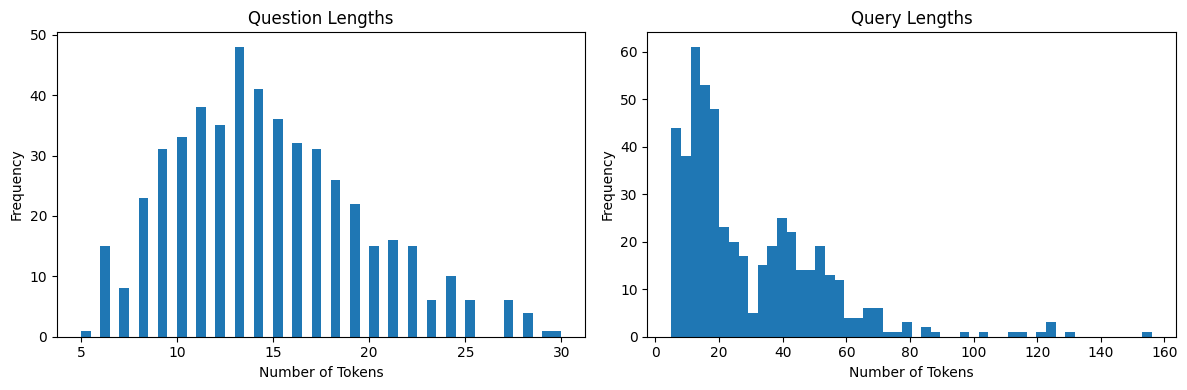

90th percentile of question lengths: 21.0
90th percentile of query lengths: 56.10000000000002
95th percentile of question lengths: 24.0
95th percentile of query lengths: 68.0
98th percentile of question lengths: 27.0
98th percentile of query lengths: 88.19999999999982
99th percentile of question lengths: 28.0
99th percentile of query lengths: 120.02999999999997
Maximum of 99th percentiles: 120
max_length: 132


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct", token=os.environ["HUGGING_FACE_HUB_TOKEN"])

def analyze_sequence_lengths(dataset, tokenizer):
    """
    Analyzes the distribution of sequence lengths in a dataset after tokenization.

    Args:
        dataset: The Hugging Face dataset to analyze.
        tokenizer: The tokenizer to use for tokenization.
    """

    question_lengths = []
    query_lengths = []

    for example in dataset:
        question_tokens = tokenizer.tokenize(example["question"])
        query_tokens = tokenizer.tokenize(example["query"])
        question_lengths.append(len(question_tokens))
        query_lengths.append(len(query_tokens))

    # Plot histograms of sequence lengths
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(question_lengths, bins=50)
    plt.title("Question Lengths")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(query_lengths, bins=50)
    plt.title("Query Lengths")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # Calculate percentiles
    for percentile in [90, 95, 98, 99]:
        q_percentile = np.percentile(question_lengths, percentile)
        sql_percentile = np.percentile(query_lengths, percentile)
        print(f"{percentile}th percentile of question lengths: {q_percentile}")
        print(f"{percentile}th percentile of query lengths: {sql_percentile}")

    max_99th_percentile = int(
    max(
        np.percentile(question_lengths, 99),
        np.percentile(query_lengths, 99),
    )
    )
    print(f"Maximum of 99th percentiles: {max_99th_percentile}")
    return max_99th_percentile


# Calling the function:
max_99th_percentile = analyze_sequence_lengths(sampled_train, tokenizer)
max_length = int(1.1 * max_99th_percentile)
print(f"max_length: {max_length}")

In [13]:
# Load the Llama 3.1 8B Instruct tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct", token=os.environ["HUGGING_FACE_HUB_TOKEN"])
tokenizer.pad_token = tokenizer.eos_token

def tokenize_function(examples):
  """
  Tokenizes the questions and SQL queries in a batch of examples.
  """
  # Tokenize questions and queries separately
  model_inputs = tokenizer(examples["question"], padding="max_length", truncation=True, max_length=max_length) #using 110% of the max percentile length for padding
  labels = tokenizer(examples["query"], padding="max_length", truncation=True, max_length=max_length)

  # Replace padding token id in labels by -100 so it's ignored by the loss function.
  labels["input_ids"] = [
      [(l if l != tokenizer.pad_token_id else -100) for l in label] for label in labels["input_ids"]
  ]

  model_inputs["labels"] = labels["input_ids"]
  return model_inputs

# Apply the tokenization function to the training and validation datasets
tokenized_train_dataset = sampled_train.map(tokenize_function, batched=True)
tokenized_val_dataset = validation_set.map(tokenize_function, batched=True)

# Remove unnecessary columns
tokenized_train_dataset = tokenized_train_dataset.remove_columns(["db_id", "query", "question", "query_toks", "query_toks_no_value", "question_toks"])
tokenized_val_dataset = tokenized_val_dataset.remove_columns(["db_id", "query", "question", "query_toks", "query_toks_no_value", "question_toks"])

mini_val_dataset = tokenized_val_dataset.select(random.sample(range(len(tokenized_val_dataset)), 5)) #Will be used to evaluate during training to reduce memory requirements and speed up training

# Print a sample to check the format
print(tokenized_train_dataset[0])

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1034 [00:00<?, ? examples/s]

{'input_ids': [128000, 3923, 527, 682, 279, 2204, 1176, 5144, 315, 279, 12050, 889, 527, 304, 2361, 439, 11509, 323, 2834, 30, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 128009, 1

#Configure LoRA and Load Model
This code section sets up LoRA (Low-Rank Adaptation) for efficient fine-tuning and loads the pre-trained Llama 3.1 8B Instruct model. We define the LoRA configuration using LoraConfig, specifying parameters like rank, scaling factor, target modules (attention layers), and dropout. The pre-trained model is loaded in 8-bit precision to save memory and automatically placed on available hardware using device_map="auto". Finally, we wrap the loaded model with LoRA adapters using get_peft_model, preparing it for fine-tuning with reduced parameter updates.

In [14]:
from peft import LoraConfig, get_peft_model
from transformers import AutoModelForCausalLM, BitsAndBytesConfig

os.environ["BNB_4BIT_COMPUTE_DTYPE"] = "torch.float16" #To use FP16 for computations within the 4-bit layers. Default is 32 which can be slower while training

# Define your custom cache directory
custom_cache_dir = "/hf_model_cache/"

# Define LoRA configuration
lora_config = LoraConfig(
    target_modules=["q_proj", "k_proj", "v_proj", "up_proj", "down_proj", "o_proj", "gate_proj"],
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none"
)


# Load pre-trained model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
)

model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Meta-Llama-3.1-8B-Instruct",
    quantization_config=quantization_config,
    device_map="auto",
    token=os.environ["HUGGING_FACE_HUB_TOKEN"],
    cache_dir=custom_cache_dir,
)

# Wrap the model with LoRA
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

trainable params: 20,971,520 || all params: 8,051,232,768 || trainable%: 0.2605


In [15]:
print(model.config)  # Prints the model's configuration settings, including parameters, architecture, and training details.

LlamaConfig {
  "_name_or_path": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermediate_size": 14336,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 32,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": false,
    "bnb_4bit_compute_dtype": "float32",
    "bnb_4bit_quant_storage": "uint8",
    "bnb_4bit_quant_type": "fp4",
    "bnb_4bit_use_double_quant": false,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,

In [16]:
print (model) #Prints a detailed summary of the model, including its layers, modules, and parameters.

PeftModel(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.1, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.Linear4b

#Training Configuration and Setup

Here we define the training parameters and creates a Trainer object for fine-tuning the Llama model.



*   The TrainingArguments class from the transformers library is used to specify various hyperparameters and settings for the training process, such as the learning rate, batch size, number of epochs, and evaluation strategy.

*   The Trainer class is then instantiated with the LoRA-wrapped Llama model, the training arguments, and the training and validation datasets. The Trainer object will manage the training loop, evaluation, logging, and saving of checkpoints.

In [20]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import DataCollatorForSeq2Seq


# Define the training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./llama-lora-finetuned", # Directory to save the fine-tuned model
    learning_rate=1e-4,                  # Learning rate for the optimizer
    per_device_train_batch_size=8,       # Batch size per GPU for training
    per_device_eval_batch_size=4,        # Batch size per GPU for evaluation
    gradient_accumulation_steps=4,
    eval_accumulation_steps=4, 
    num_train_epochs=4,                  # Number of training epochs
    weight_decay=0.01,                   # Weight decay for regularization
    eval_strategy="steps",               # Evaluation strategy: evaluate every 'eval_steps'
    eval_steps=5,                        # Number of steps between evaluations
    save_steps=5,                        # Number of steps between saving checkpoints
    logging_steps=5,                     # Number of steps between logging training information
    report_to="none",
    logging_strategy="steps",            # Log every `logging_steps`
#    fp16=True,                           #Useful if the model is not quantized to 4 bits
#    metric_for_best_model="exact_match", #Required only if evaluation is done on test data 
#    predict_with_generate=True,
#    generation_num_beams=5,  # For beam search during generation
)


data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Create the Trainer object
trainer = Seq2SeqTrainer(
    model=model,                             # The LoRA-wrapped Llama model
    args=training_args,                      # The training arguments
    train_dataset=tokenized_train_dataset,   # The tokenized training dataset
    eval_dataset=mini_val_dataset,           # The tokenized mini validation dataset
#    compute_metrics=compute_metrics,         #Required for evaluation on test data
    data_collator=data_collator,
)

# Training the Model

In [21]:
trainer_stats = trainer.train()

Step,Training Loss,Validation Loss
5,8.045200,No log
10,5.868400,No log
15,5.338300,No log
20,5.034500,No log
25,4.806300,No log
30,4.701200,No log
35,4.461700,No log
40,4.568600,No log
45,4.382000,No log
50,4.331600,No log


In [22]:
trainer_stats

TrainOutput(global_step=60, training_loss=4.999993260701498, metrics={'train_runtime': 2252.3129, 'train_samples_per_second': 0.888, 'train_steps_per_second': 0.027, 'total_flos': 1.1372652667994112e+16, 'train_loss': 4.999993260701498, 'epoch': 3.8095238095238093})

# Merging LoRA Weights and Saving the Model

In [23]:
# Merge LoRA weights back into the base model
model = model.merge_and_unload()

# Save the merged model to your device
model.save_pretrained("./llama-lora-finetuned/final_model") 
print("Merged model saved successfully!")

/opt/conda/lib/python3.10/site-packages/peft/tuners/lora/bnb.py:336: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


Merged model saved successfully!


# Load the finetuned model for inferencing 

In [35]:
from transformers import AutoModelForCausalLM, BitsAndBytesConfig

model_path = "./llama-lora-finetuned/final_model"  

# Define the quantization configuration (remove deprecated arguments)
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,  # If you're using 4-bit quantization
)

# Load the fine-tuned model with custom device map
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="cuda:0",
    quantization_config=quant_config,
)
print("Fine-tuned model loaded successfully!")

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Fine-tuned model loaded successfully!


# Setup for Inference with Streaming Output

In [74]:
from transformers import TextIteratorStreamer
from threading import Thread

# Create a TextIteratorStreamer for streaming output
streamer = TextIteratorStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

# Define a function for inference
def generate_sql(question):
    # Tokenize the input question
    inputs = tokenizer(question, return_tensors="pt", padding=True, truncation=True).to(model.device)

    # Generate text with streaming
    generation_kwargs = dict(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],  # Include attention mask
        streamer=streamer,
        max_new_tokens=200,  # Adjust as needed
        temperature=0.5,  # Control randomness
        top_p=0.7,  # Nucleus sampling
        num_beams=1,  # Beam search for better quality
        early_stopping=True,  # Stop early if all beams finish
        do_sample=False,  # Disable sampling for more focused output
        length_penalty=2,  # Penalize longer outputs
        repetition_penalty=1.5,
    )
    thread = Thread(target=model.generate, kwargs=generation_kwargs)
    thread.start()

    # Print the streamed output
    for new_text in streamer:
        print(new_text, end="", flush=True)

# Run Inference

In [75]:
# Example usage
question = "You are sql expert. Write a good useful SQL Query for this: Show name, country, age for all singers ordered by age from the oldest to the youngest."
print(f"Question: {question}")
print("Generated SQL:")
generate_sql(question) 

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:634: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Question: You are sql expert. Write a good useful SQL Query for this: Show name, country, age for all singers ordered by age from the oldest to the youngest.
Generated SQL:
 
SELECT * FROM Singers ORDER BY Age DESC;
This query will return ALL columns of Singer table and order them in descending (oldest first) based on 'Age' column.

However if you want only Name, Country  AND AGE then use
 SELECT NAME,Country,Age   FROM SINGERS    Order By Age Desc; 

If we need more than one singer with same max(age), how can I get it?  
To fetch multiple rows where there is tie or duplicate value at top i.e., maximum values.
We have already seen that MAX() function returns single row which has highest/maximum date but what about when two records exist having equal Max(date). In such cases our previous approach fails because as soon as second record exists whose Date =Max(Date )then result set becomes empty whereas actual expected output should be both these dates since they share common attribute "Da